In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xg
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams["font.family"] = "serif"

In [2]:
dataset = pd.read_csv('BTS.csv')

In [3]:
print(dataset)

    Set  Temp  Sample Cycle  ...      σm1      σm2  Avg (σm1, σm2)  FR
0     I    25       1     a  ...  0.00000  0.00000         0.00000 NaN
1     I    25       2     a  ...  0.00000  0.00000         0.00000 NaN
2     I    25       3     a  ...  0.00000  0.00000         0.00000 NaN
3     I   250       1     a  ...  0.00000  0.00000         0.00000 NaN
4     I   250       2     a  ...  0.00000  0.00000         0.00000 NaN
..  ...   ...     ...   ...  ...      ...      ...             ...  ..
80  III  1000       2     b  ...  0.21797  0.39261         0.30529 NaN
81  III  1000       2     c  ...  0.21797  0.39261         0.30529 NaN
82  III  1000       3     a  ...  0.27870  0.37902         0.32886 NaN
83  III  1000       3     b  ...  0.27870  0.37902         0.32886 NaN
84  III  1000       3     c  ...  0.27870  0.37902         0.32886 NaN

[85 rows x 9 columns]


In [4]:
X = dataset.iloc[ : , 0:5].values
y = dataset.iloc[ : , -2].values

In [5]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.07093
 0.07093  0.07418  0.07418  0.074325 0.074325 0.188905 0.188905 0.19437
 0.19437  0.197425 0.197425 0.07816  0.07816  0.119745 0.119745 0.872095
 0.872095 0.12395  0.12395  0.60301  0.60301  0.04706  0.04706  0.14284
 0.14284  0.139935 0.139935 1.092115 1.092115 1.092115 1.096785 1.096785
 1.096785 0.619015 0.619015 0.619015 0.87483  0.87483  0.87483  1.2274
 1.2274   1.2274   0.60072  0.60072  0.60072  2.006955 2.006955 2.006955
 0.62671  0.62671  0.62671  1.228225 1.228225 1.228225 1.70816  1.70816
 1.70816  1.45064  1.45064  1.45064  0.42009  0.42009  0.42009  0.30529
 0.30529  0.30529  0.32886  0.32886  0.32886 ]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [9]:
xgb_model2 = XGBRegressor(n_estimators=250)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

[08:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [10]:
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_test)

In [11]:
print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Train r2 score:  0.843719679335555
Test r2 score:  0.8890571741888691
Train RMSE: 0.1882
Test RMSE: 0.2016


In [12]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[2.68161297e-04 0.00000000e+00]
 [7.10054040e-02 0.00000000e+00]
 [1.54385245e+00 2.00695500e+00]
 [2.31848449e-01 1.39935000e-01]
 [1.03339720e+00 1.09678500e+00]
 [4.75583225e-01 1.19745000e-01]
 [8.12627554e-01 6.19015000e-01]
 [4.40745354e-01 4.20090000e-01]
 [9.21553850e-01 1.22740000e+00]
 [9.41730499e-01 1.09211500e+00]
 [1.16157025e-01 0.00000000e+00]
 [2.03598082e-01 1.97425000e-01]
 [1.69735700e-01 1.23950000e-01]]


In [13]:
#plt.plot(y_test, color = 'red', label = 'Real data')
#plt.plot(y_pred2, color = 'blue', label = 'Predicted data')
#plt.xlabel('Serial number of data point in test set')
#plt.ylabel('Memory Stress (MPa)')
#plt.title('BTS Prediction')
#plt.legend()
#plt.show()

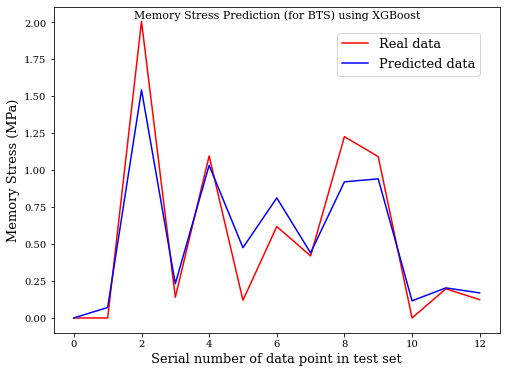

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred2, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for BTS) using XGBoost', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("BTS (XGBoost)",dpi=1500,bbox_inches = 'tight')
plt.show()